In [8]:
## Basics of Image Processing

In [9]:
from numba import jit
import numpy as np
import tensorflow as tf
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [10]:
import pandas as pd
from PIL import Image

In [11]:
## Drive Mounting

# from google.colab import drive
# drive.mount("/content/drive")

In [12]:
# File Downloading in Download Folder
# from google.colab import files
# files.download("/content/drive/MyDrive/Images/download.jpg")

In [13]:
# File Copying in working dir

# !mkdir images
# !cp /content/drive/MyDrive/Images/download.jpg images/
# #

In [14]:
# !ls images/

In [15]:
img_data = np.asarray(Image.open("D:books/download.jpg"))

In [16]:
img_data_norm = img_data / 255.
img_norm = img_data_norm[:,:,0] # Only One Channel

In [17]:
img_norm.shape

(1280, 1280)

In [18]:
# Kernel Sliding (Image Convolutions)

In [19]:
kernel = (np.array([[1,1,1],[0,0,1],[0,0,1]])) /1.

In [20]:
kernel

array([[1., 1., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [21]:
import matplotlib.pyplot as plt

(-0.5, 1279.5, 1279.5, -0.5)

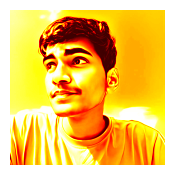

In [22]:
plt.figure(figsize=(2,3))
plt.imshow(img_norm, cmap="hot")
plt.axis(False)

In [23]:
kernel
new_buff  = np.zeros((img_norm.shape[0]-2 ,img_norm.shape[1]-2 ), dtype=np.float32)
new_buff.shape
temp = np.zeros((3,3), dtype=np.float32)
temp


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [24]:
from numba import jit

@jit(nopython=True)   # Wrap everything inside a function for using jit
def apply_filter(img_norm, kernel,new_buff):
    for i in range(img_norm.shape[0] - 2):
        for j in range(img_norm.shape[1] - 2):
            temp = 0.0
            for _ in range(3):
                for __ in range(3):
                    temp += kernel[_, __] * img_norm[i + _, j + __]
            new_buff[i, j] = temp 
    
    return new_buff

In [25]:
apply_filter(img_norm, kernel,new_buff)

array([[4.5686274, 4.5686274, 4.5686274, ..., 3.3921568, 3.3921568,
        3.3921568],
       [4.5686274, 4.5686274, 4.5686274, ..., 3.3921568, 3.3921568,
        3.3921568],
       [4.5686274, 4.5686274, 4.5686274, ..., 3.3921568, 3.3921568,
        3.3921568],
       ...,
       [2.0666666, 2.0784314, 2.1176472, ..., 3.454902 , 3.4627452,
        3.4666667],
       [2.035294 , 2.0392158, 2.0823529, ..., 3.4509804, 3.454902 ,
        3.4588234],
       [2.0392158, 2.0431373, 2.0901961, ..., 3.4509804, 3.4509804,
        3.4509804]], dtype=float32)

In [26]:
img_norm[10][:10]

array([0.91372549, 0.91372549, 0.91372549, 0.91372549, 0.91372549,
       0.91372549, 0.91372549, 0.91372549, 0.90980392, 0.90980392])

In [27]:
new_buff[10][:10]

array([4.5686274, 4.5686274, 4.5686274, 4.5686274, 4.5686274, 4.5686274,
       4.556863 , 4.5529413, 4.54902  , 4.54902  ], dtype=float32)

(-0.5, 1277.5, 1277.5, -0.5)

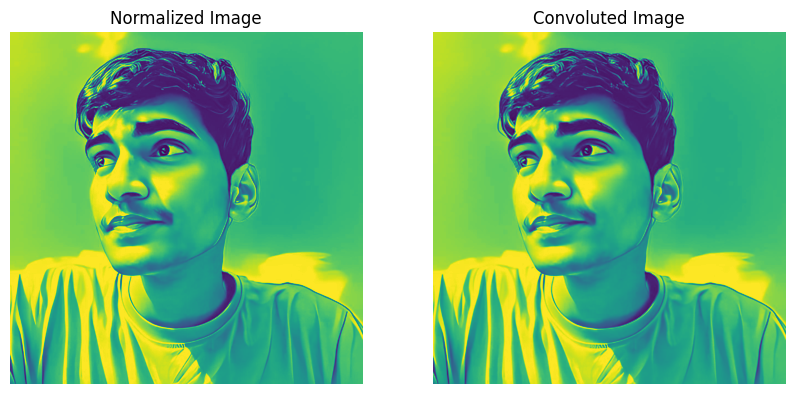

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Normalized Image")
plt.imshow(img_norm)
plt.axis(False)
plt.subplot(1,2,2)
plt.title("Convoluted Image")
plt.imshow(new_buff)
plt.axis(False)

In [29]:
class Convolution:
    
  def __init__(self,round,orig_img) -> None:
    self.rounds = round
    self.orig_img = orig_img
    self.ht = orig_img.shape[0] - 2
    self.wt = orig_img.shape[1] - 2
    self.new_img = np.zeros((self.ht , self.wt), dtype=np.float32)
    self.kernel = np.array([
      [1.,1.,1.],
      [0.,0.,1.],
      [0., 0., 1.]
      ])

  def doConv2D(self):
    for row in range(self.ht):
      for col in range(self.wt):
        temp = 0
        for _ in range(3):
          for __ in range(3):
            temp += self.kernel[_, __ ] * self.orig_img[row + _, col + __]
        temp /= 9
        self.new_img[row, col] = temp

    return self.new_img


In [30]:
c = Convolution(1, new_buff)

In [31]:
conv2 = c.doConv2D()

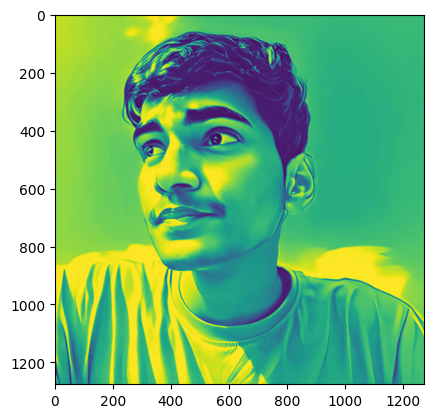

In [32]:
norm_conv2 = conv2/conv2.max()
plt.imshow(norm_conv2)


## MaxPooling Algorithm
- **Approach**
     
     - Define a sliding window ( Square Matrix -> ) Eg. For Maxpooling 2D ( 2 x 2 Square Matrix ), for 3D -> 3 x 3

     - Slide over the image pixels

     - Define the stride

In [33]:
class MaxPooling:
  def __init__(self,orig_img,stride=2):
    self.orig_img = orig_img
    self.stride = stride
    # self.checkTheSize()
    self.ht, self.wt = orig_img.shape[0] //2, orig_img.shape[1]//2
    self.new_img = np.zeros((self.ht, self.wt), dtype=np.float32)


  def pooling(self):
    rows =  0
    for row in range(0,self.orig_img.shape[0],2):
      cols = 0
      for col in range(0,self.orig_img.shape[1], 2):
        self.kernel = np.zeros(shape=(self.stride, self.stride), dtype=np.float32)
        for _ in range(2):
          for __ in range(2):
            self.kernel[_,__] = self.orig_img[row + _, col + __]

        self.new_img[rows, cols] = self.kernel.max()
        cols += 1
      rows += 1

    return self.new_img


In [34]:
m = MaxPooling(conv2)

In [35]:
maxpol2 = m.pooling()

In [36]:
(maxpol2.shape[0] *2 , maxpol2.shape[1] *2) == conv2.shape

True

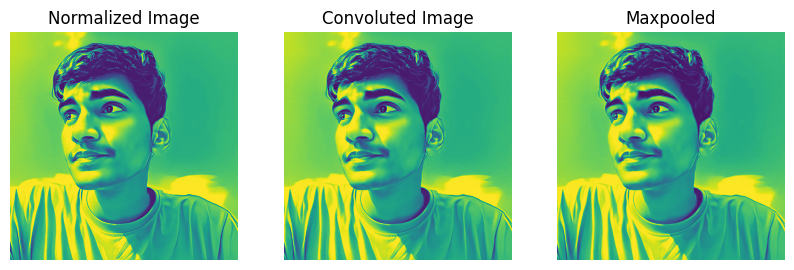

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Normalized Image")
plt.imshow(img_norm)
plt.axis(False)
plt.subplot(1,3,2)
plt.title("Convoluted Image")
plt.imshow(new_buff)
plt.axis(False)
plt.subplot(1,3,3)
plt.imshow(maxpol2)
plt.title("Maxpooled")
plt.axis(False)
plt.imshow(maxpol2)

# Blurring 

### Normal Blur
    
    - Define a kernel **(3 x 3)**
    - Stride over the image pixels & perform matrix mul 
    - Must pad the corners to avoid loss of pixels
    

In [39]:
norm_kernel = np.array([
    [1/9, 1/9 , 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

In [84]:
from numba import jit 

@jit(nopython=True)
def padThePixels(x):
    lt_pad , rt_pad = x.shape[0] %3 , x.shape[1] % 3
    blur_buff = np.zeros((x.shape[0] + lt_pad, x.shape[1] + rt_pad), dtype=np.float32)
    for row in range(1,blur_buff.shape[0] -1 ):
        for col in range(1,blur_buff.shape[1] -1 ):
            blur_buff[row, col] = x[row, col]
    return blur_buff

In [59]:
blur_buff = padThePixels(img_norm[:,:])

In [79]:

def plotImg(a,b,title="Image", cmap="hot",axis=False):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title("Before")
    plt.imshow(a, cmap=cmap)
    plt.axis(False)
    plt.subplot(1,2,2)
    plt.title("After")
    plt.imshow(b, cmap=cmap)
    plt.axis(False)

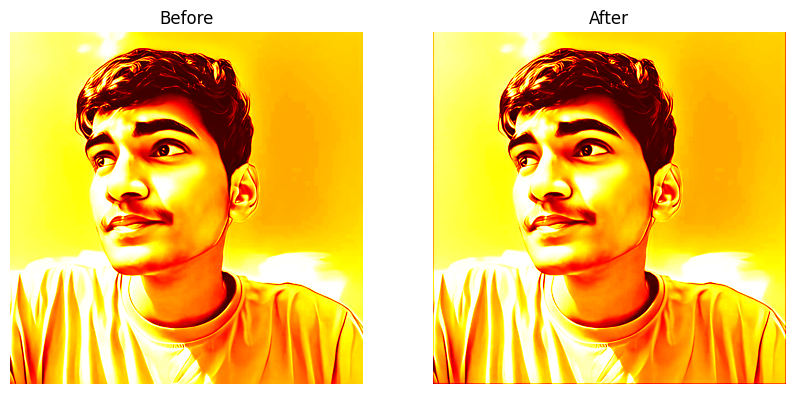

In [85]:
# Before -> Normal After -> Padded Image
plotImg(img_norm, blur_buff)